## Machine Learning

### supervised learning
#### - classification VS regression


model : 일종의 선. data의 class를 구분짓는 선..
model parameter : 선을 표현할 수 있는 특정 숫자들..

deep learning 에서 parameter - 가중치를 의미
->  parameter는  계속 학습을 통해 조정이 됨.



### Unsupervised Learning
#### Label is not used 
ex1) clustering (레이블 관계 X 특징을 바탕으로 군집화함)
ex2) 차원축소



### Scikit-Learn

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


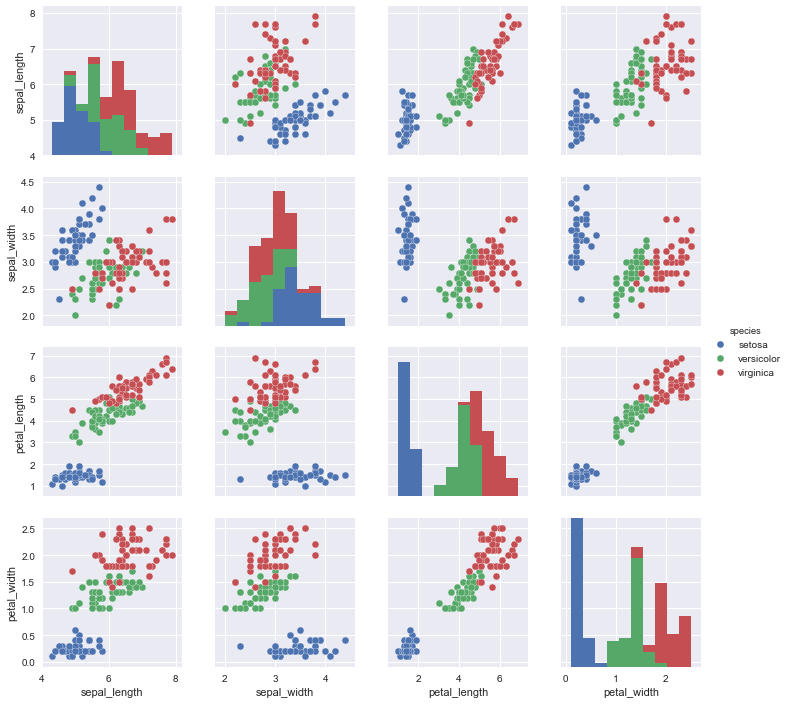

In [4]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species')

In [5]:
X_iris = iris.drop('species',axis=1) 
X_iris.shape

# species 열을 drop, sample 만 넣어주고 y는 species 가 됨
#(150,40) -> sample 갯수가 150개 이고 feature 는 4개!(sepal,petal에대한 각각의 length/width 이므로)

(150, 4)

In [8]:
Y_iris = iris['species']
Y_iris.shape

(150,)

## Scikit-Learn Workflow

1. 적당한 측정치 클래스를 import 해서 모델 고르기
2. 인스턴트화
3. feature matrix(X) - target vector(Y) 형태로 만들어주기
4. 모델의 fit() method 호출
5. 새로운 데이터를 가지고 모델에 적용


supervised - used predict() method
unsupervisd learning - use transform() method

#### 1. 적당 측정치 클래스를 import 해서 모델 고르기

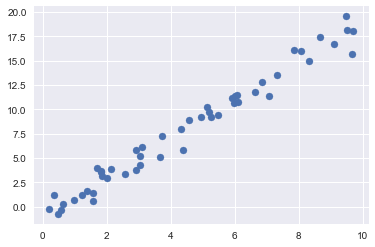

In [13]:
import numpy as np
import matplotlib.pyplot as plt

rng  = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

In [20]:
from sklearn.linear_model import LinearRegression

#### 2. Instantiate

In [21]:
model =  LinearRegression(fit_intercept=True)
model

## model class와 해당 model의 instance는 엄연히 다름. 
## model을 class 로부터 instance 해줄때 여러가지 option(hyperparameter)를 설정해주므로.. 완전히 같은 것이라고는 할 수 없음

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 3. reconstruct

In [23]:
X = x[:,np.newaxis]
X.shape

# x는 단순 feature가 단순 값이므로 차원만 늘려준다

(50, 1)

In [26]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
model.coef_

# 기울기

array([1.9776566])

In [28]:
model.intercept_

# y 절편

-0.9033107255311164

In [29]:
xfit = np.linspace(-1,11)

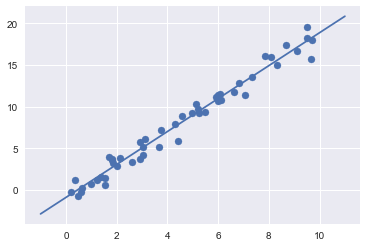

In [33]:
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x,y)
plt.plot(xfit,yfit)

### Classification

In [52]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_iris,Y_iris,random_state=1)

In [146]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

1.0

### Unsupervised Example : 차원축소

In [35]:
from sklearn.decomposition import PCA ## input 데이터를 중요한 요소만 압축하는 것..
model = PCA(n_components = 2)
model.fit(X_iris)
X_2D = model.transform(X_iris) ### X_iris 를 2 dimension 으로 축소!!!!!

In [37]:
X_2D

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

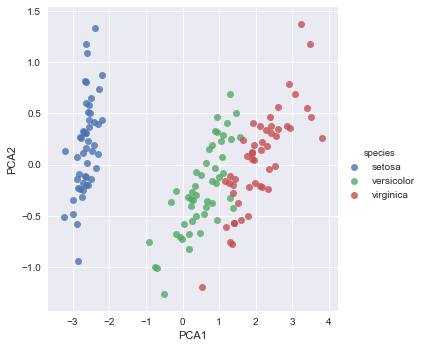

In [41]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='species',data=iris,fit_reg=False)

In [74]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


### Clustering

In [43]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

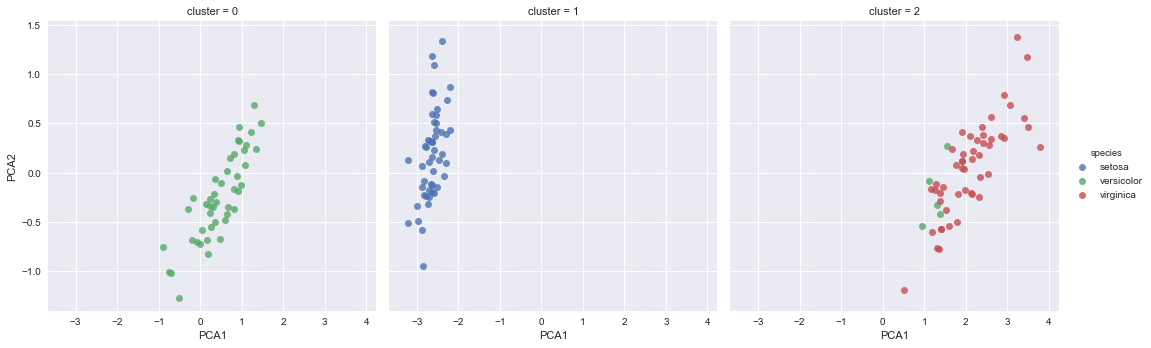

In [93]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1","PCA2",data=iris,hue='species',col='cluster',fit_reg=False)

### Exercise

In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

X_digits = digits['data']
Y_digits = digits['target']

XDtrain,XDtest,ydtrain,ydtest = train_test_split(X_digits,Y_digits,random_state=0)

In [61]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [62]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(XDtrain,ydtrain)
y_model = model.predict(XDtest)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(ydtest,y_model)

0.8333333333333334

### Confusion Matrix

Text(92.68,0.5,'true')

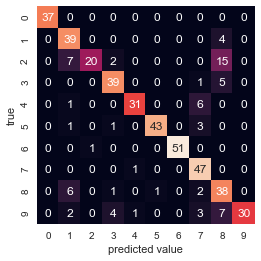

In [125]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ydtest,y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true')

### Hyperparameter and Model Validation

##### choosing hyperparameter is important 
###### 모델 설계가 굉장히 중요!!!!!!!

In [65]:
from sklearn.datasets import load_iris

iris= load_iris() 
X = iris.data
y = iris.target
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=0)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest,y_model)

0.9736842105263158

### model validation - 어느정도로 train / test data 나누는게 맞는건지 확인하는 것
#### 1.hold-out
#### 2. cross-validation
- 데이터가 100개 있으면 hold-out set을 두번 돌린다..
ex) 첫번째는 1-50 까지 train / 51-100 test , 두번째는 반대로 51-100 train / 1-50 test

In [66]:
X1,X2,y1,y2 = train_test_split(X,y,random_state=0,train_size=0.5)
model.fit(X1,y1)
y_model = model.predict(X2)
accuracy_score(y2,y_model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9066666666666666

In [70]:
y1_model = model.fit(X2,y2).predict(X1)
y2_model = model.fit(X1,y2).predict(X2)
accuracy_score(y1,y1_model),accuracy_score(y2,y2_model)

(0.96, 0.48)

In [75]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,X,y,cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### selecting best model
#### hyperparameter VS parameter 

parameter : 학습과정에서 추출되고 변하는 value
hyperparameter : pre-defined, learning-process가 진행되기 이전에 사람에 의해서 정해짐


underfiting  : 애매모호함 - bias

overfiting : 너무 지나치게 fit됨.. -> 추후 input data에 대해서 유연하게 처리하기가 어려움...  - variance


bias - variance 중간에서 황금 밸런스를 찾아야함


### One-hot-encoding
sparce vector : 0이 대부분인 벡터...

0-1로만 나타냄...... 맞으면1, 아니면 0으로..